<a href="https://colab.research.google.com/github/JedRoundy/Machine_Learning_For_Economists/blob/main/PSET_3/pset3coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Set 2

Many of the concepts needed to complete this homework are introduced in the recitation notebooks and the python tutorials.

In [1]:
# Import the packages and libraries you will use here
from pandas.plotting import scatter_matrix
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
# Set the maximum number of columns to display
pd.set_option('display.max_columns', None)



### 1
This exercise relates to the College data set, which can be found in the file College.csv. It contains a number of variables for 777 different universities and colleges in the US. The variables are  
* Private : Public/private indicator  
* Apps : Number of applications received  
* Accept : Number of applicants accepted  
* Enroll : Number of new students enrolled  
* Top10perc : New students from top 10 % of high school class  
* Top25perc : New students from top 25 % of high school class  
* F.Undergrad : Number of full-time undergraduates
* P.Undergrad : Number of part-time undergraduates  
* Outstate : Out-of-state tuition  
* Room.Board : Room and board costs  
* Books : Estimated book costs  
* Personal : Estimated personal spending  
* PhD : Percent of faculty with Ph.D.’s  
* Terminal : Percent of faculty with terminal degree  
* S.F.Ratio : Student/faculty ratio  
* perc.alumni : Percent of alumni who donate  
* Expend : Instructional expenditure per student  
* Grad.Rate : Graduation rate  
Before reading the data into python, it can be viewed in Excel or a text editor is well.

### (a)
Use the pandas read_csv() function to read the data into python. Call the loaded data df. Make sure that you have the directory set to the correct location for the data or use the absolute filepath so the program knows where to look for the file. Use `head` and `tail` to show the first 10 and last 10 observations of the data,the default is five so you will need to add an argument for the number of rows.

In [2]:
#Read in the csv file
df = pd.read_csv('https://www.statlearning.com/s/College.csv')

#Call the df
df

#Show the head of the df
df.head(n = 10)

#Show the tail
df.tail(n = 10)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
767,Winthrop University,No,2320,1805,769,24,61,3395,670,6400,3392,580,2150,71,80,12.8,26,6729,59
768,Wisconsin Lutheran College,Yes,152,128,75,17,41,282,22,9100,3700,500,1400,48,48,8.5,26,8960,50
769,Wittenberg University,Yes,1979,1739,575,42,68,1980,144,15948,4404,400,800,82,95,12.8,29,10414,78
770,Wofford College,Yes,1501,935,273,51,83,1059,34,12680,4150,605,1440,91,92,15.3,42,7875,75
771,Worcester Polytechnic Institute,Yes,2768,2314,682,49,86,2802,86,15884,5370,530,730,92,94,15.2,34,10774,82
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99
776,York College of Pennsylvania,Yes,2989,1855,691,28,63,2988,1726,4990,3560,500,1250,75,75,18.1,28,4509,99


### (b)
Read in the data again this time calling the data college and using the parameter index_col=0 in the read_csv function. Notice the difference between the index used when the dataframe is displayed.

In [3]:
#Read in the csv with modified args
df = pd.read_csv('https://www.statlearning.com/s/College.csv', index_col = 0)

#It uses column 0 as the index!
df

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


### (c)
Now we will do some prelimainary analysis and visualizations of the data that was loaded  
$\mathbf{i)}$ Use the describe method of the dataframe object that you made by reading in the data to show the summary statistics of each of the columns

In [4]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


$\mathbf{ii)}$ Use the scatter_matrix function that was imported from pandas to produce scatter plots of the pairwise combinations of 6 of the variables of your choice. Adjust the figsize argument make the displayed plots more readable and understandable.

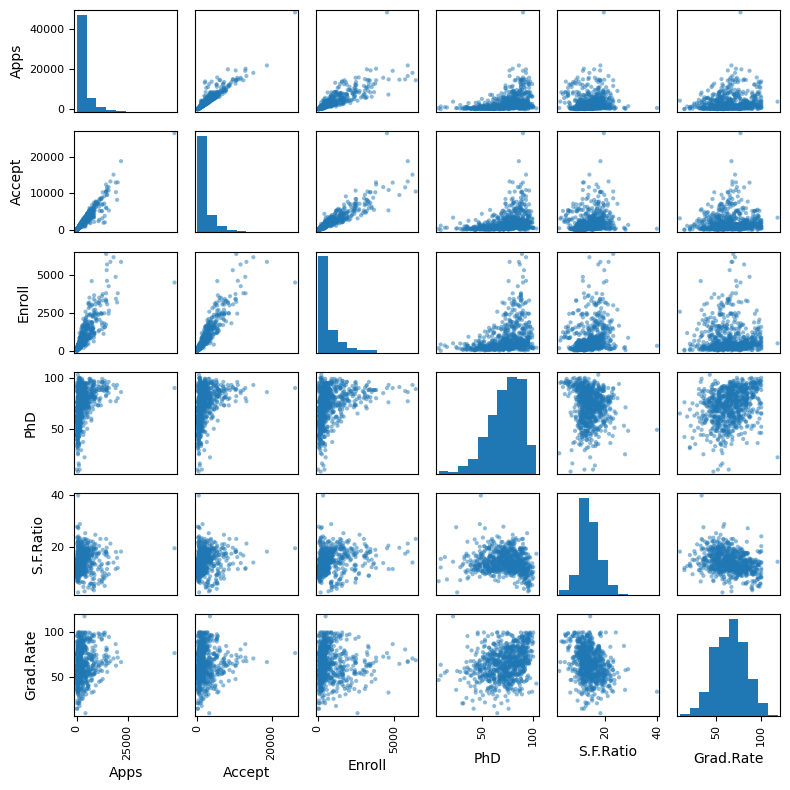

In [5]:
# call the function above these lines
scatter_matrix(df[['Apps', 'Accept', 'Enroll', 'PhD', 'S.F.Ratio', 'Grad.Rate']], figsize = (8, 8))

plt.tight_layout() # this makes the output a little neater when you display plots
plt.show() # this will force the plots to show, they only show without this if they are the output of the last line in a cell

$\mathbf{iii)}$ Use seaborn's or matplotlib's boxplot function to create a boxplot of Outstate on private.  
Hint: You can either pass in the columns as objects or the names of the columns and use data=college as a parameter

<Axes: xlabel='Outstate'>

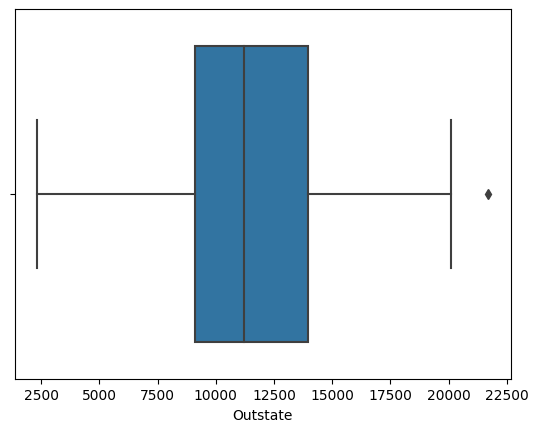

In [6]:


private_df = df[df['Private'] == "Yes"]

sns.boxplot(private_df, x = 'Outstate')

$\mathbf{iv)}$  Create a new qualitative variable in the dataframe, called Elite, by binning the Top10perc variable. We are going to divide universities into two groups based on whether or not the number of students coming from the top 10% of their high school classes exceeds 50.

In [7]:
#Check for eliteness
df['Elite'] = (df['Top10perc'] > 50)

Get a count of how many universities are in the 'Elite' category. Now make boxplot of Outstate on Elite.

<Axes: xlabel='Outstate'>

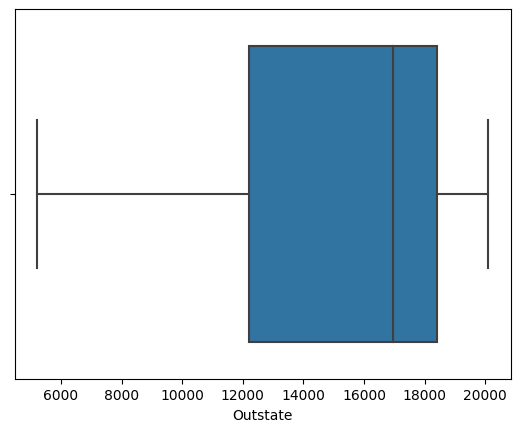

In [8]:
#Count how many Elite universities there are
df['Elite'].count()

#Create a df of only elite universities
elite_df = df[df['Elite'] == True]

#Boxplot for outstate on Elite
sns.boxplot(elite_df, x = 'Outstate')

$\mathbf{v)}$ Use seaborn's distplot function to produce some histograms with differing numbers of bins for a quantitative variable of your choice. You can make multiple cells or if you are familiar with python try making a grid of multiple plots to be displayed by one cell.

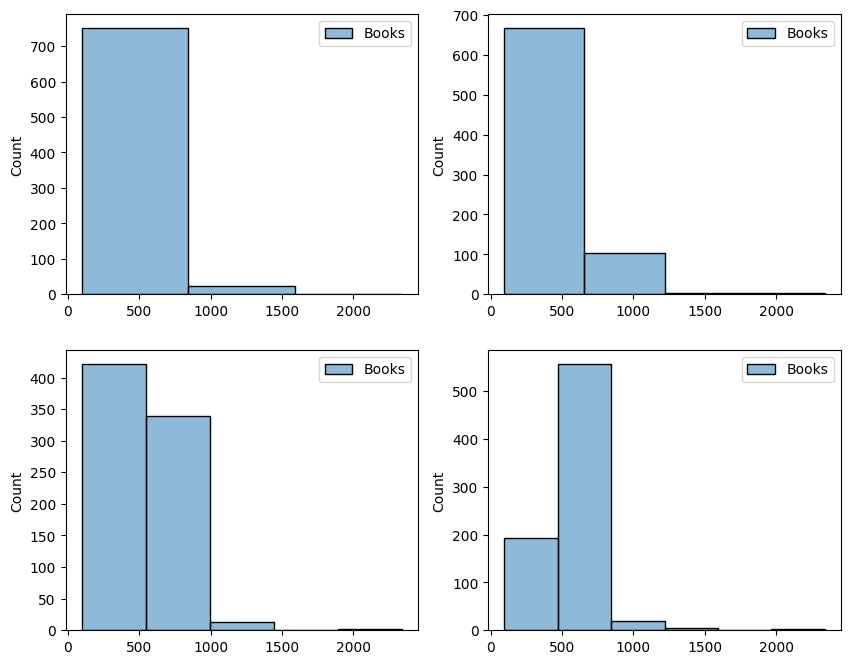

In [9]:
#create a figure and axes
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
#create 4 plots and assign subplots
sns.histplot(df[['Books']], bins = 3, ax = axes[0,0])
sns.histplot(df[['Books']], bins = 4, ax = axes[0,1])
sns.histplot(df[['Books']], bins = 5, ax = axes[1,0])
sns.histplot(df[['Books']], bins = 6, ax = axes[1,1])
#show the plot
plt.show()

You can create a grid of histograms with the hist method of the dataframe. Choose some variables that seem interesting and create hhistograms in this way.

array([[<Axes: title={'center': 'Accept'}>,
        <Axes: title={'center': 'Enroll'}>],
       [<Axes: title={'center': 'S.F.Ratio'}>,
        <Axes: title={'center': 'Grad.Rate'}>]], dtype=object)

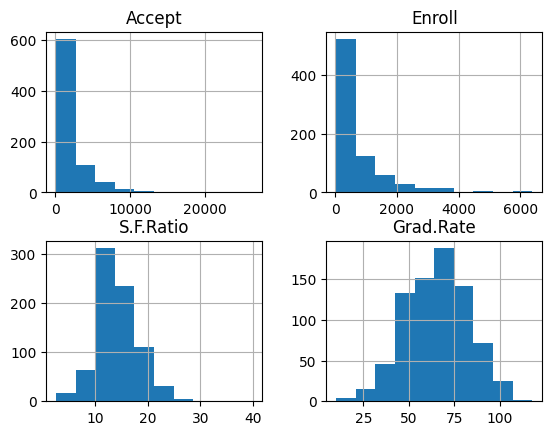

In [10]:
df.hist(column = ['Accept', 'Enroll', 'S.F.Ratio','Grad.Rate'])





Using the tools that were introduced and/or other ones you find, continue exploring the data set and write a brief summary of what you find. This should involve something you do that was not a part of the previous responses.  
We are not looking for anything in particular just try to make something that shows something about the data ond its relationships in graphs or summary statistics that you haven't already created above.

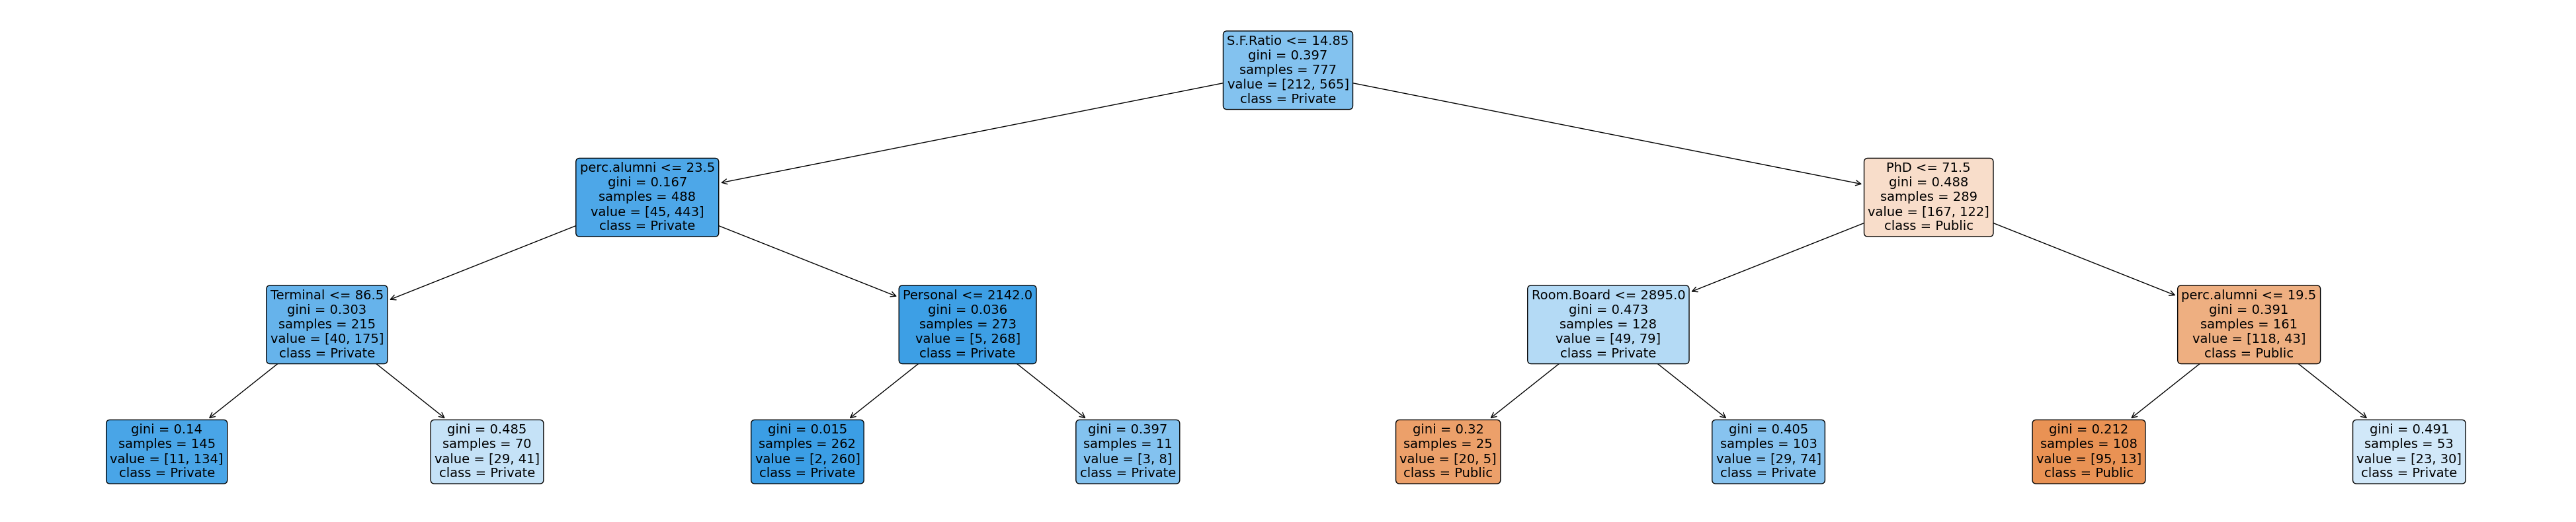

In [11]:
#I am going to use a decision tree classifier to find out which variables are most telling if an institution is private or public
#!pip install dtreeviz
from sklearn.tree import DecisionTreeClassifier, plot_tree

df['Total Enrolled'] = df['F.Undergrad'] + df['P.Undergrad']
df['Pct F.Undergrad'] = df['F.Undergrad'] / df['Total Enrolled']
df['Pct P.Undergrad'] = df['P.Undergrad'] / df['Total Enrolled']
var_list = ['Private', 'F.Undergrad', 'P.Undergrad', 'Apps', 'Accept', 'Enroll', 'Total Enrolled','Outstate']

X = df.loc[:, [col for col in df if col not in var_list]]
y = df['Private']

dtc = DecisionTreeClassifier(max_depth=3, random_state=42)
dtc.fit(X, y)

plt.figure(figsize=(50,10))
a = plot_tree(dtc,
              feature_names = X.columns,
              class_names = ['Public', 'Private'],
              filled=True,
              rounded=True,
              fontsize=14)



Explain what you did and what it means here

I made a decision classifier tree to see what the most prevalent characteristics are between private and public schools, aside from things that simply indicate the size of the organization, as public schools are almost exclusively larger than private schools.

Thus, most of the variables I included are percentages of other variables, or variables that are already in percent form.

The most important feature is student to faculty ratio. Private schools boast smaller S.F. ratios. In fact, no public school in the sample has a student faculty ratio below 14.85. The second most distinctive feature is if the school has more than 71.5% of faculty with a PhD, with private schools boasting a higher percentage again.

## Chapter 3
$\mathbf{a)}$Load in auto.csv as a dataframe and the produce a grid of the pairwise scatterplots of the variables of the dataframe

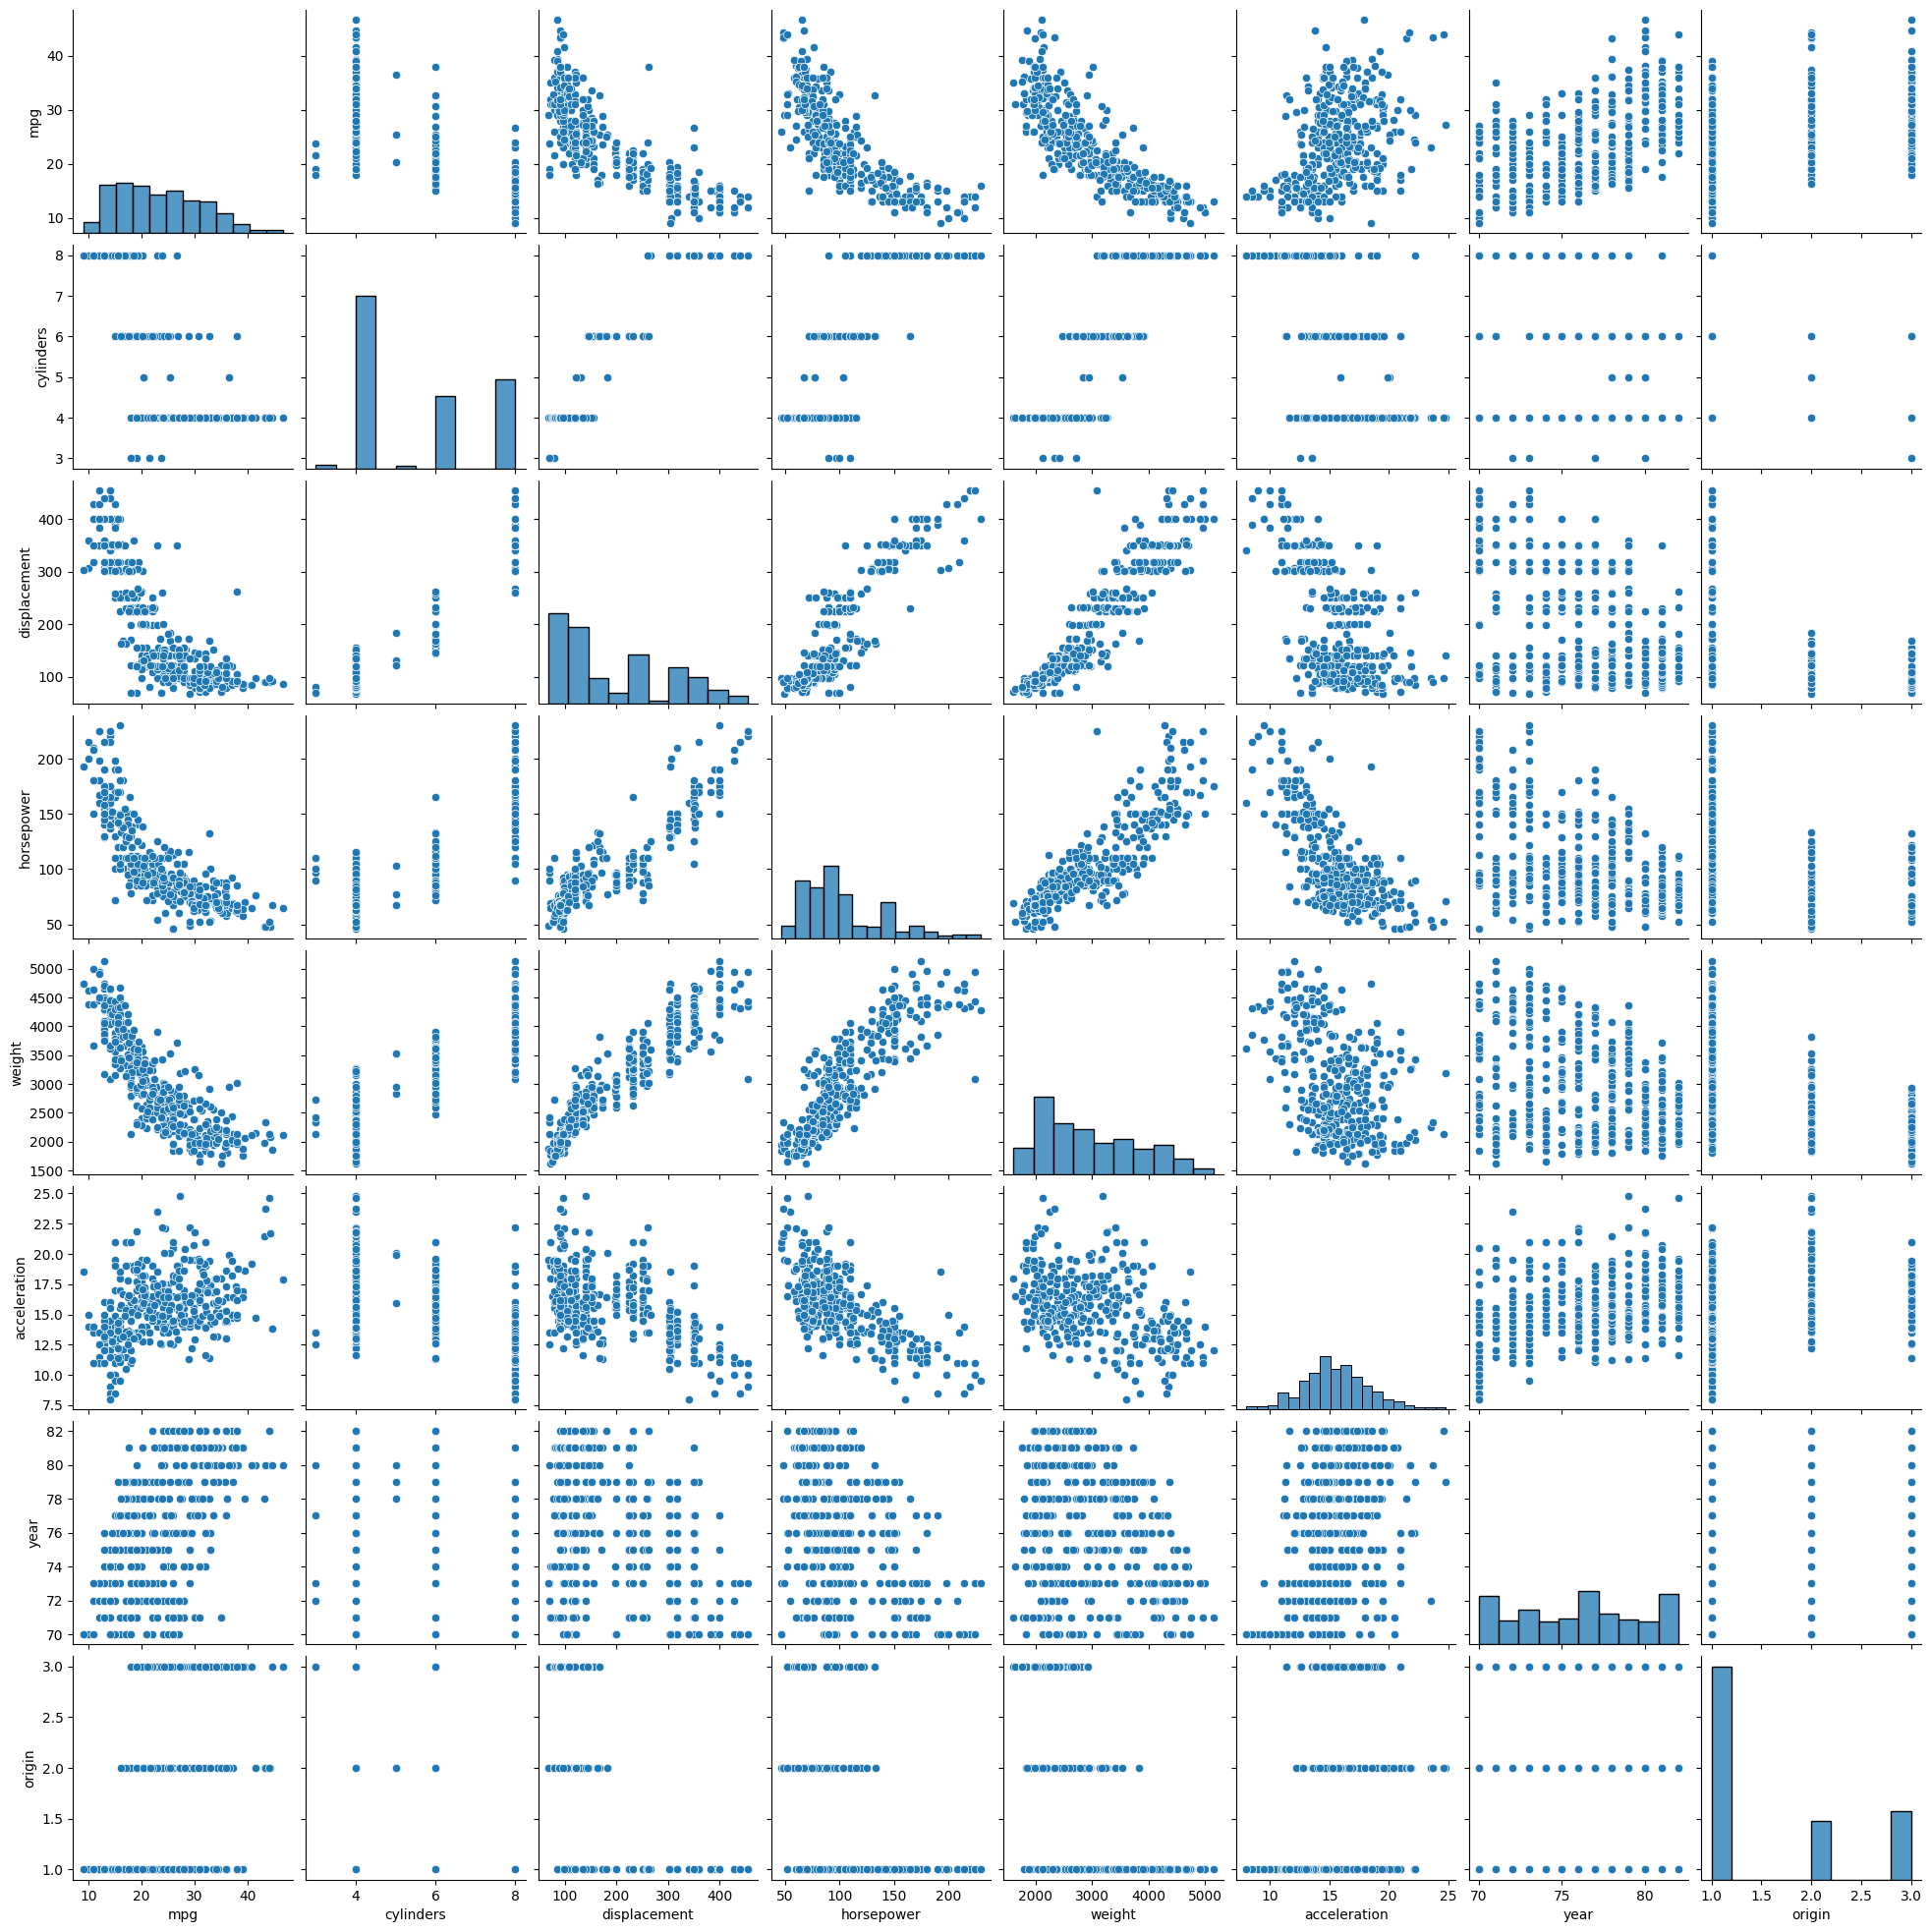

In [12]:
#read data from csv file online
auto = pd.read_csv('https://www.statlearning.com/s/Auto.csv', index_col = 'name')

#remove rows with question mark
auto = auto[auto['horsepower'] != '?']
auto['horsepower'] = auto['horsepower'].astype(int)

#create pairplot
sns.pairplot(auto)

$\mathbf{b)}$ Show the correlation matrix. There are several ways to do this but you should be able to find a function that makes it for the numeric variables of a dataframe.

<Axes: >

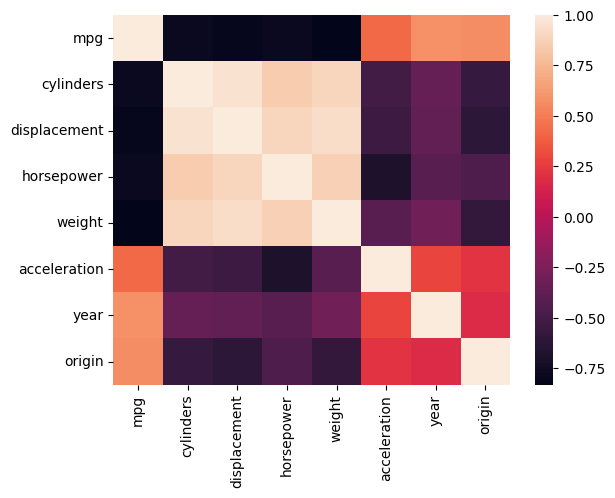

In [13]:
corr = auto.corr(numeric_only = True)
sns.heatmap(corr)

$\mathbf{c)}$ Use the statsmodel OLS function to perform a linear regression with mpg as the response and year as a feature (a variable in the regression). Use the summary() method to print the results.

In [14]:
# fill in the variable names you plan on using in the regression
X = auto.loc[:,['year']]
y = auto['mpg']
reg_obj = sm.OLS(y,X)
results = reg_obj.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    mpg   R-squared (uncentered):                   0.915
Model:                            OLS   Adj. R-squared (uncentered):              0.915
Method:                 Least Squares   F-statistic:                              4222.
Date:                Sat, 07 Oct 2023   Prob (F-statistic):                   1.25e-211
Time:                        05:07:55   Log-Likelihood:                         -1329.7
No. Observations:                 392   AIC:                                      2661.
Df Residuals:                     391   BIC:                                      2665.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Do a linear regression with mpg as the outcome and all other variables except name as the predictors. Comment on the output. For instance:  
i. Is there a relationship between the predictors and the response?  
ii. Which predictors appear to have a statistically significant relationship to the response?  
iii. What does the coefficient for the year variable suggest?

In [15]:
X = auto.loc[:,[col for col in auto.columns if (col != 'mpg')]]
y = auto['mpg']
reg_obj = sm.OLS(y,X)
results = reg_obj.fit()
print(results.summary())

X.info()


#i. Yes, there is a relationship between the features and mpg
#ii. All of the variables seem to have a significant relationship with mpg besides acceleration
#iii. It suggests that for each new year, cars get just over half a mile per gallon than the previous year.

                                 OLS Regression Results                                
Dep. Variable:                    mpg   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              2933.
Date:                Sat, 07 Oct 2023   Prob (F-statistic):                        0.00
Time:                        05:07:55   Log-Likelihood:                         -1030.4
No. Observations:                 392   AIC:                                      2075.
Df Residuals:                     385   BIC:                                      2103.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

$\mathbf{d)}$ Use statsmodels' inluence_plot() function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

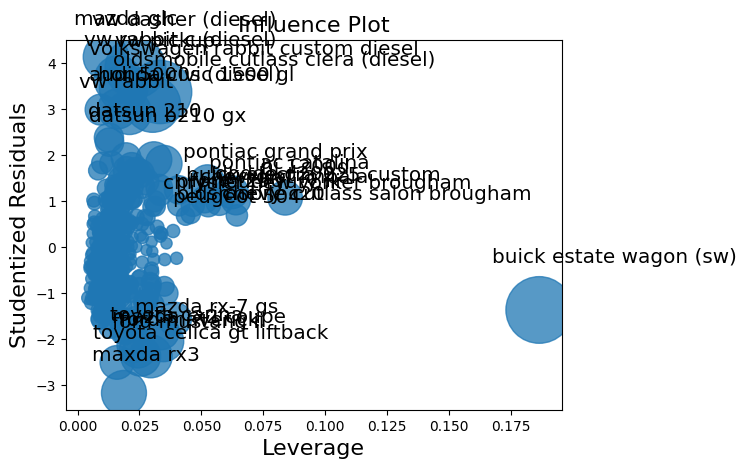

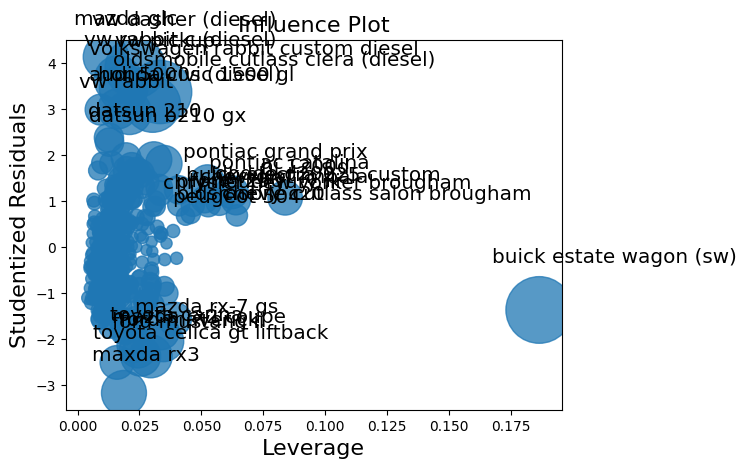

In [16]:
sm.graphics.influence_plot(results = results)

#there are plenty of cars that are outliers (3 or more sd's) and the buick estate wagon has very high leverage compared to any other observations

$\mathbf{e)}$ Create some polynomial and interaction features from the existing set of variables and fit linear regression models with them. Do any interaction terms appear to be statistically significant? What about polynomial terms?  
A relativley easy way to do this si the use scikit-learn's polynomial features but you can add in interaction and squared columns individually to the dataframe by multiplying columns together.

In [17]:
#Create polynomials for weight and cylinders, and interaction terms for cylinders & displacement, weight & acceleration, and weight & cylinders.
auto['weight_2'] = auto['weight']**2
auto['cyl_2'] = auto['cylinders']**2

#interaction features
auto['cyl_disp'] = auto['cylinders'] * auto['displacement']
auto['weight_acc'] = auto['weight'] * auto['acceleration']
auto['weight_cyl'] = auto['weight'] * auto['cylinders']

#Assign X all columns except mpg
X = auto.loc[:,[col for col in auto.columns if (col != 'mpg')]]

y = auto['mpg']
reg_obj = sm.OLS(y,X)
results = reg_obj.fit()
print(results.summary())

#Surprisingly, I got a feature that is "significant" with the interaction between cylinders and displacement




                                 OLS Regression Results                                
Dep. Variable:                    mpg   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              2237.
Date:                Sat, 07 Oct 2023   Prob (F-statistic):                        0.00
Time:                        05:08:00   Log-Likelihood:                         -976.20
No. Observations:                 392   AIC:                                      1976.
Df Residuals:                     380   BIC:                                      2024.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

## PCA
In the first cell I have some code which will generate some random data with 500 features and 10000 observations. There will be 3 clusters of groups indicated by the y variable. Use PCA to reduce the dimensionality down to 2 principle components. Sklearn has a PCA and TruncatedSVD object you can use, the difference will just be demeaning the values or not so there shouldn't be a big difference in results from either method.

In [18]:
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

SEED = 123
X, y = make_blobs(n_samples=1000, n_features=5000, cluster_std=90., random_state=SEED)

In [19]:
#create pca object specifying 2 features
pca = PCA(2)
#fit the pca object to data
pca.fit(X)
#transform current array according to pca
X_pca = pca.transform(X)

Generate a plot of the 2 principal components that were found. You may find it helpful to combine X and y into a pandas DataFrame object so that it plays mroe nicely with seaborn.

<Axes: >

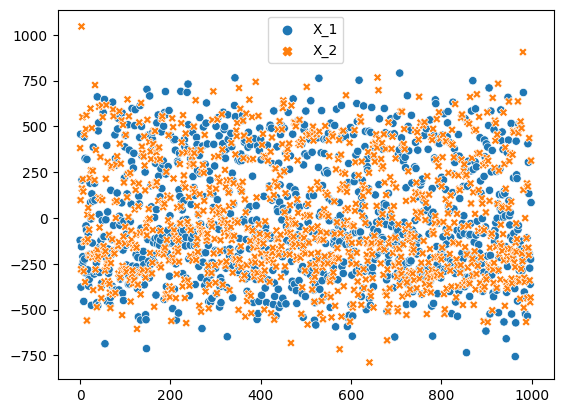

In [20]:
#create first df from X array
df1 = pd.DataFrame(X_pca, columns = ['X_1', 'X_2'])
#create second from y array
df2 = pd.DataFrame(y, columns = ['Y'])
#concat df's along column axis
df_pca = pd.concat([df1, df2], axis = 1)



#scatterplot
sns.scatterplot(df_pca[['X_1', 'X_2']])

## KMeans

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report

Perform K-means clustering of the observations with K = 3. How well do the clusters that you obtained in K-means clustering compare to the true class labels? You can use the classifcation report function from skelarn to get some metrics that measure the quality of the model you used.

In [22]:
df1 = pd.DataFrame(X)
df = pd.concat([df1, df2], axis = 1)


kmeans = KMeans(3, random_state = 13)
kmeans.fit(X)

df['KM3 Label'] = kmeans.labels_

report = classification_report(df['Y'], df['KM3 Label'])

print(report)

              precision    recall  f1-score   support

           0       0.25      0.09      0.13       334
           1       0.47      0.51      0.49       333
           2       0.39      0.61      0.47       333

    accuracy                           0.40      1000
   macro avg       0.37      0.40      0.36      1000
weighted avg       0.37      0.40      0.36      1000



Perform K-means clustering with K = 2. Describe your results.

In [23]:
kmeans = KMeans(2, random_state = 42)
kmeans.fit(X)

df['KM2 Label'] = kmeans.labels_

report = classification_report(df['Y'], df['KM2 Label'])

print(report)


#df[['Y', 'KM2 Label', 'KM3 Label', 'KM4 Label']]
#This clustering set performs worse than K = 3. Probably because we have three distinct categories we are trying to predict, and we are limiting ourselves to 2 labels here, thus completely missing cluster 2.

              precision    recall  f1-score   support

           0       0.33      0.53      0.41       334
           1       0.44      0.62      0.51       333
           2       0.00      0.00      0.00       333

    accuracy                           0.38      1000
   macro avg       0.26      0.38      0.31      1000
weighted avg       0.26      0.38      0.31      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Now perform K-means clustering with K = 4, and describe your results.

In [24]:
kmeans = KMeans(4, random_state = 42)
kmeans.fit(X)

df['KM4 Label'] = kmeans.labels_

report = classification_report(df['Y'], df['KM4 Label'])

print(report)

#This method predict 2 fairly well, and does better than k=2, but still not as good as k = 3

              precision    recall  f1-score   support

           0       0.39      0.16      0.23       334
           1       0.22      0.17      0.19       333
           2       0.40      0.55      0.47       333
           3       0.00      0.00      0.00         0

    accuracy                           0.29      1000
   macro avg       0.26      0.22      0.22      1000
weighted avg       0.34      0.29      0.30      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Now perform K-means clustering with K = 3 on the first two principal component score vectors, rather than on the raw data. That is, perform K-means clustering on the 60 × 2 matrix of which the first column is the first principal component score vector, and the second column is the second principal component score vector. Comment on the results.

In [25]:
kmeans = KMeans(3, random_state = 13)
kmeans.fit(X_pca)

df_pca['KM3 Label'] = kmeans.labels_

report = classification_report(df_pca['Y'], df_pca['KM3 Label'])

print(report)




              precision    recall  f1-score   support

           0       0.97      0.98      0.98       334
           1       0.03      0.03      0.03       333
           2       0.02      0.02      0.02       333

    accuracy                           0.34      1000
   macro avg       0.34      0.34      0.34      1000
weighted avg       0.34      0.34      0.34      1000



Using of of sklearn's data scalers, perform K-means clustering with K = 3 on the data after scaling each variable to have standard deviation one. How do these results compare to those obtained in (b)? Explain.

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_pca[['X_1', 'X_2']])
df_pca[['X_1', 'X_2']] = scaler.transform(df_pca[['X_1', 'X_2']])


km3 = KMeans(3)
km3.fit(df_pca[['X_1','X_2']])
df_pca['KM3_Standard'] = km3.labels_

report = classification_report(df_pca['Y'], df_pca['KM3_Standard'])

print(report)

#When the data is scaled, it is losing a lot of precision and accuracy on classifying 0's and 2's.
#It may be because the euclidean distances are all muuuch closer to each other than they were, making it more difficult to distinguish between clusters.

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       334
           1       0.03      0.03      0.03       333
           2       0.01      0.01      0.01       333

    accuracy                           0.34      1000
   macro avg       0.34      0.34      0.34      1000
weighted avg       0.34      0.34      0.34      1000



## Supervised Machine Learning
In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the `Auto` data set. you should be able to use the same dataframe for the previous problem using the auto dataset here as well or you can load it in and start over if you want to practice

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

Calling the functions is similar for all of the functions from sklearn. This is one of the really nice things about the library: if you know how to use one then you know how to use them all. You will be asked to use models we have not deeply discussed in lecture but that will not change the coding aspect of it so you should be able to complete the assignment without knowing what exactly is happening. This is just meant to introduce you to how to use models from scikit-learn so don't worry if this is the case. This is one of the problems with the way a lot of people try to use machine learning so I do not recommend it in the future as predictions from a model you don't understand are probably not very good predictions no matter how good the scoring metrics do.

In [28]:
# this creates a variable named mpg01 that indicates whetehr or not gas mileage iss above the median of the sample
auto['mpg01'] = auto['mpg'] > auto['mpg'].median()

Scikit-learn is set up so that if you know how to use one model you know how to use them all. Here is an example of the steps that you will follow in general for classification, like in the following question. A regression problem is with a continuous outcome and classification is with a discrete outcome.
```python
from sklearn.submoodule import Model # import a model from the appropriate submodule of scikit-learn
model_obj = Model() # create a model object with relevant tuning parameters
model_obj.fit(X, y) # fit the model to your data
model_obj.score(X, y) # get a score of how well the model does using a loss function
```

$(a)$ Create an X matrix and a Y vector. The variable you created called `mpg01` will be the y variable.  
Are there any variables that should not be included? Hint: I am aking this because there is a variable that should not be included.

In [29]:
X = auto.loc[:,[col for col in auto if (col != 'mpg') and (col != 'mpg01') ]]
y = auto['mpg01']


#we shouldn't be including mpg,  or mpg01

$(b)$ Perform Linear Discriminant Analysis (LDA) on the training data in order to predict `mpg01`. How accurate is the model?

In [30]:
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
lda.score(X, y)

#accuracy of over 91%

0.9132653061224489

$(c)$ Perform Quadratic Discriminant Analysis (QDA) on the training data in order to predict `mpg01`. How accurate is the model?

In [31]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X, y)
qda.score(X,y)
#Just better than lda at 91.6%

0.9158163265306123

$(d)$ Perform logistic regression on the training data in order to predict `mpg01`. How accurate is the model?

In [32]:
logit = LogisticRegression()
logit.fit(X,y)
logit.score(X,y)
#Still 90's, but not quite as good as the other two

0.8979591836734694

$(e)$ Perform K-nearest Neighbors on the training data in order to predict `mpg01`. How accurate is the model?  
Which value of K seems to perform the best on this data set?

In [33]:
for k in range(1,10):
  knn = KNeighborsClassifier(k)
  knn.fit(X,y)
  print(knn.score(X,y))

#a k of 1 predicts with perfect accuracy!

1.0
0.9158163265306123
0.9183673469387755
0.9132653061224489
0.9081632653061225
0.9005102040816326
0.8979591836734694
0.8954081632653061
0.8852040816326531


$(f)$ Now run a random forest classifier on the data. If you are feeling comfortable with this, you can try different parameters to try and tune the model to give better results. This is not necessary to receive full credit.

In [34]:
rf = RandomForestClassifier()
rf.fit(X,y)
rf.score(X,y)

#Seems to predict perfectly!

1.0